# Monochrome camera calibration
One of the great disadvantages with using lenses is the distortion it introduces to the image. For vacation images, this is usually not a problem, but when we use the image to describe the physical surroundings it becomes important that the images are representative of the scene it captures. An easy way to get an indication of how distorted an image is by looking at what is supposed to be straight lines since they will appear curved. The following exercises you will be calibrating a camera to obtain a camera matrix such that you can undistort images from this camera.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

## Exercise 1
The process of calibrating an image consists of mainly 3 steps: 1) find chessboard-corners in a dataset of images containing a chessboard. 2) Use the corner points to compute a camera matrix. 3) Use the camera matrix to undistort images.

After setting some optimization parameters we can loop over all the images in the `imgs` folder and extract the checkerboard corners.

Use any of the images in the folder `imgs` to extract the number of checkerboard corners there are on the checkerboard. Fill in the information in `nb_vertical` and `nb_horizontal` and look up the opencv `findChessboardCorners` function and implement it in the below code snippet .

In [2]:
"""
Implement the number of vertical and horizontal corners
nb_vertical = ...
nb_horizontal = ...
"""
nb_vertical = 6
nb_horizontal = 9

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp_left = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp_left[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints_left = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.

images_left = glob.glob('rs/left*.png')
assert images_left


for fname in images_left:
    img_left = cv2.imread(fname)
    h, w = img_left.shape[:2]
    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(img_left, (nb_vertical,nb_horizontal),  None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints_left.append(objp_left)

        imgpoints_left.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img_left, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img_left)
        cv2.waitKey(20)

cv2.destroyAllWindows()


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp_right = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp_right[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints_right = [] # 3d point in real world space
imgpoints_right = [] # 2d points in image plane.


images_right = glob.glob('rs/right*.png')
assert images_right


for fname in images_right:
    img_right = cv2.imread(fname)
    h, w = img_right.shape[:2]
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(img_right, (nb_vertical,nb_horizontal),  None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints_right.append(objp_right)

        imgpoints_right.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img_right, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img_right)
        cv2.waitKey(20)

cv2.destroyAllWindows()

In [3]:
print(np.asarray(objpoints_left).shape)
print(np.asarray(imgpoints_left).shape)

(76, 54, 3)
(76, 54, 1, 2)


In [4]:
print(np.asarray(objpoints_right).shape)
print(np.asarray(imgpoints_right).shape)

(76, 54, 3)
(76, 54, 1, 2)


Using the extracted corners we can obtain a camera matrix that contains the information needed to undistort images

In [5]:
ret_left, mtx_left, dist_left, rvecs_left, tvecs_left = cv2.calibrateCamera(objpoints_left, imgpoints_left, gray_left.shape[::-1], None, None)
img_left = cv2.imread('rs/left-0000.png')
h,  w = img_left.shape[:2]
newcameramtx_left, roi_left = cv2.getOptimalNewCameraMatrix(mtx_left,dist_left,(w,h),1,(w,h))
print (newcameramtx_left)

[[366.46514893   0.         325.13521861]
 [  0.         367.27105713 247.98819868]
 [  0.           0.           1.        ]]


In [6]:
print (mtx_left)
print (newcameramtx_left)
print (dist_left)

[[374.15542746   0.         322.5458778 ]
 [  0.         374.76828627 245.0365406 ]
 [  0.           0.           1.        ]]
[[366.46514893   0.         325.13521861]
 [  0.         367.27105713 247.98819868]
 [  0.           0.           1.        ]]
[[-0.00355737 -0.00809525  0.00356795  0.0023219   0.00040023]]


In [7]:
ret_right, mtx_right, dist_right, rvecs_right, tvecs_right = cv2.calibrateCamera(objpoints_right, imgpoints_right, gray_right.shape[::-1], None, None)
img_right = cv2.imread('rs/right-0000.png')
h,  w = img_right.shape[:2]
newcameramtx_right, roi_right = cv2.getOptimalNewCameraMatrix(mtx_right,dist_right,(w,h),1,(w,h))
print (newcameramtx_right)

[[368.80545044   0.         323.23753744]
 [  0.         369.61694336 246.36468556]
 [  0.           0.           1.        ]]


In [8]:
print (mtx_right)
print (newcameramtx_right)
print (dist_right)

[[375.12142808   0.         321.76685217]
 [  0.         375.43918525 244.06233105]
 [  0.           0.           1.        ]]
[[368.80545044   0.         323.23753744]
 [  0.         369.61694336 246.36468556]
 [  0.           0.           1.        ]]
[[-0.00278624 -0.01329625  0.00292272  0.00138697  0.00553181]]


The last step is to actually undistort an image:

Text(0.5, 1.0, 'Undistorted image')

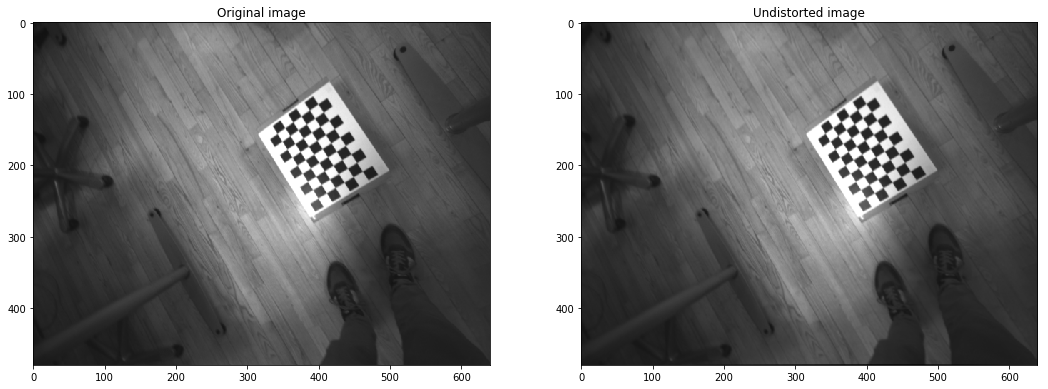

In [9]:
# undistort
dst_right = cv2.undistort(img_right, mtx_right, dist_right, None, None)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img_right[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst_right[...,[2,1,0]])
ax[1].set_title('Undistorted image')

A refining step can be to crop the image such that it doesn't contain the large black areas at the edges of the image.

(4, 4, 633, 474)


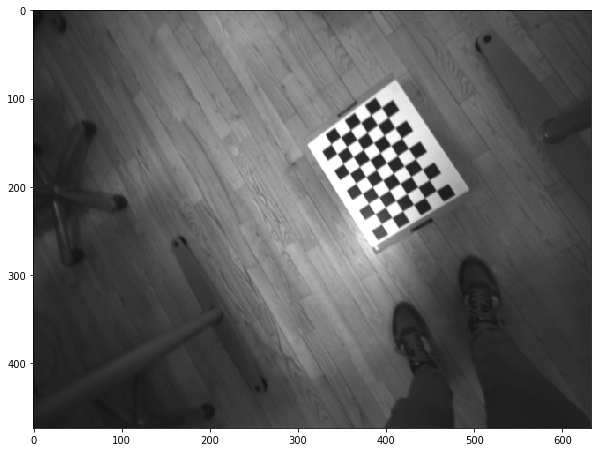

In [10]:
# crop the image
print(roi_right)
x,y,w,h = roi_right
dst_right = dst_right[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst_right[...,[2,1,0]])
img2=dst_right[...,[2,1,0]]

In [12]:
np.sum(objpoints_right)

26676.0

Text(0.5, 1.0, 'Undistorted image')

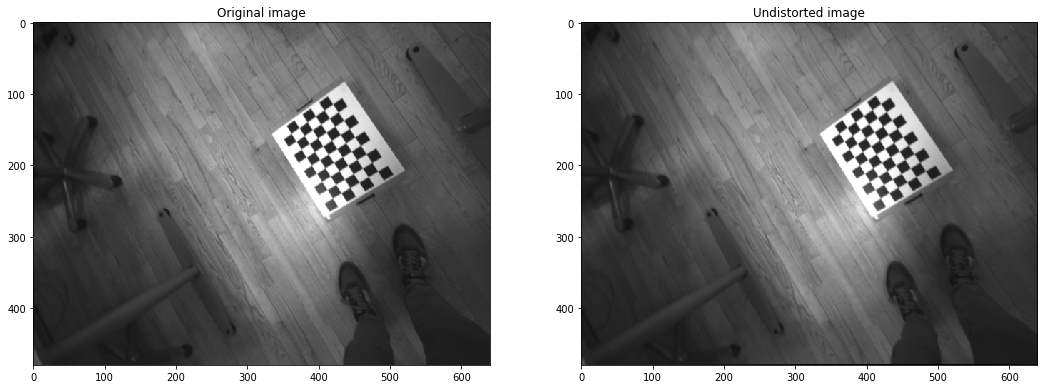

In [13]:
# undistort
dst_left = cv2.undistort(img_left, mtx_left, dist_left, None, None)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img_left[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst_left[...,[2,1,0]])
ax[1].set_title('Undistorted image')

(5, 5, 631, 472)


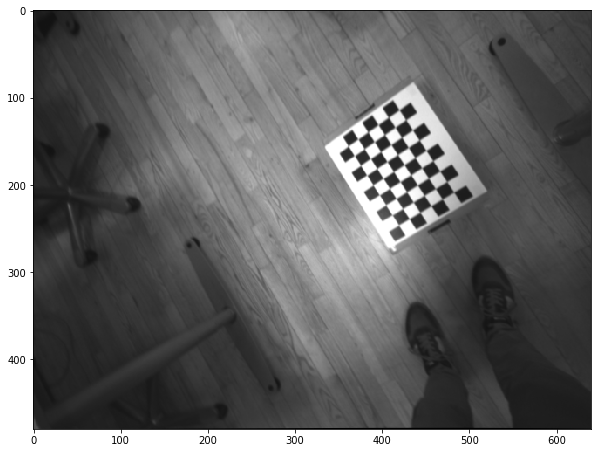

In [14]:
# crop the image
print(roi_left)
x,y,w,h = roi_left
dst = dst_left[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst_left[...,[2,1,0]])
img1=dst_left[...,[2,1,0]]

In [37]:
_,_,_,_,_,R,T,E,F= cv2.stereoCalibrate(objpoints_right,imgpoints_left,imgpoints_right,mtx_left, dist_left, mtx_right, dist_right,(img1.shape[1], img1.shape[0]))

In [23]:
retval = cv2.stereoRectify(mtx_left, dist_left, mtx_right, dist_right, (img1.shape[1], img1.shape[0]), R, T)

In [42]:
# termination criteria
criteria = (cv2.TermCriteria_EPS +
                    cv2.TermCriteria_MAX_ITER, 30, 0.001)

In [74]:
# find the chess board corners in undistorted image

### UNCALIBRATED RECTIFICATION ###
imgpoints_l_undis = []
imgpoints_r_undis = []

ret_l_undis, corners_l_undis = cv2.findChessboardCorners(img1, (nb_vertical,nb_horizontal), None)
ret_r_undis, corners_r_undis = cv2.findChessboardCorners(img2, (nb_vertical,nb_horizontal), None)

if ret_l_undis is True:
    rt = cv2.cornerSubPix(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY), corners_l_undis, (11, 11), (-1, -1), criteria)
    for j in range(0, len(rt)):
        x = rt[j][0,:]
        imgpoints_l_undis.append(x)

    if ret_r_undis is True:
        rt = cv2.cornerSubPix(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY), corners_r_undis, (11, 11), (-1, -1), criteria)
        for j in range(0, len(rt)):
            x = rt[j][0,:]
            imgpoints_r_undis.append(x)

# convert to np array
imgpoints_l_undis = np.array(imgpoints_l_undis)
imgpoints_r_undis = np.array(imgpoints_r_undis)

error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [66]:
# compute rectification uncalibrated
ret, uncRectMtx1, uncRectMtx2 = cv2.stereoRectifyUncalibrated(imgpoints_l_undis, imgpoints_r_undis, F, (img1.shape[1], img1.shape[0]))


In [67]:
# warp for uncalibrated rectification
imglUncalRect = cv2.warpPerspective(img1, uncRectMtx1, (img1.shape[1], img1.shape[0]))
imgrUncalRect = cv2.warpPerspective(img2, uncRectMtx2, (img1.shape[1], img1.shape[0]))

Text(0.5, 1.0, 'Undistorted image')

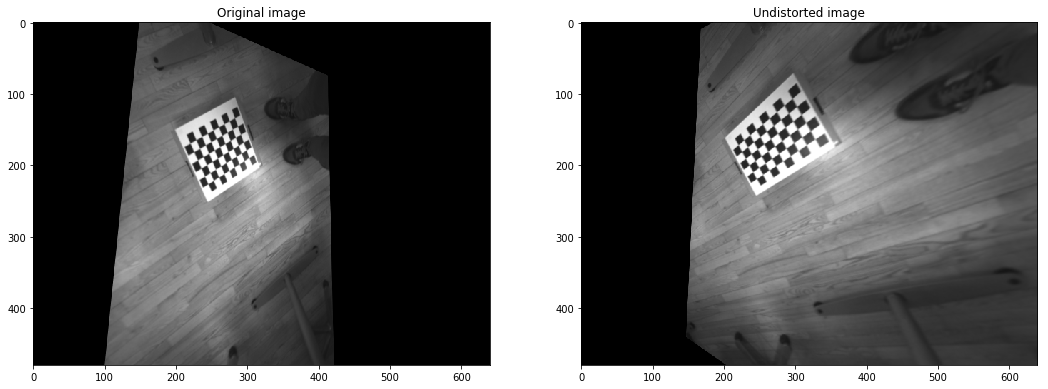

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(imglUncalRect[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(imgrUncalRect[...,[2,1,0]])
ax[1].set_title('Undistorted image')

In [32]:
imglUncalRect.dtype

dtype('uint8')

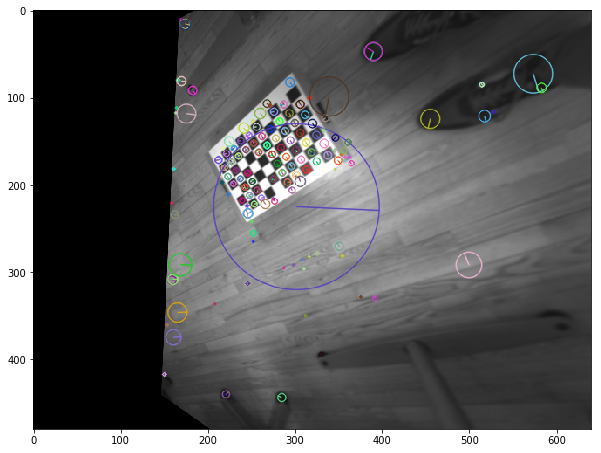

In [69]:
img1 = cv2.cvtColor(imglUncalRect, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(imgrUncalRect, cv2.COLOR_BGR2GRAY)
"""
Detect keypoints here
kp1, des1 = ...
kp2, des2 = ...
"""
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

kp_img = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,10))
plt.imshow(kp_img)

In [70]:
"""
Implement bf matcher here
matches = ...
"""
bf = cv2.BFMatcher()
matches = bf.match(des1,des2)

# Sort them in the order of their distance (i.e. best matches first).
matches = sorted(matches, key = lambda x:x.distance)

In [71]:
nb_matches = 200

good = []
pts1 = []
pts2 = []

for m in matches[:nb_matches]:
    good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
    
"""
Implement findFundamentalMat here:
F, mask = ...
"""
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [72]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

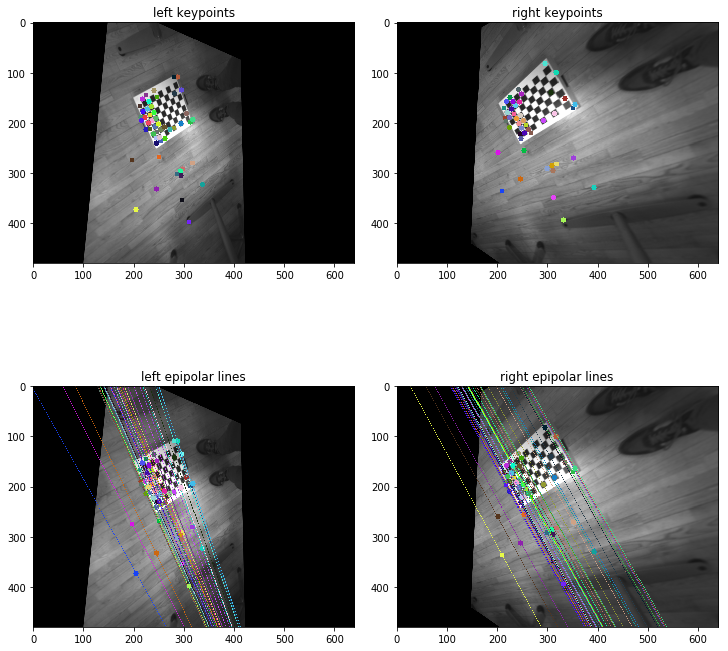

In [73]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2 ,F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
axs[0, 0].imshow(img4)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img6)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img5)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img3)
axs[1, 1].set_title('right epipolar lines')
plt.show()